In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [2]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
from plotly import graph_objs as go
from plotly import tools as tls

In [3]:
symbols =['btc', 'eth', 'aapl', 'spx']

In [4]:
data = dict()

In [5]:
for symbol in symbols:
    sent = pd.read_csv('data/pred/pred_stw_brt_si1_' + symbol + '.csv', index_col=0, parse_dates=True)
    prices = pd.read_csv('data/prices/' + symbol + '_prices.csv', index_col=0, parse_dates=True, header=None)
    prices_sh = prices.shift(1)
    prices_sh.iloc[0] = prices.values[0]
    prices = np.log(prices / prices_sh)
    data[symbol] = (sent, prices)

In [6]:
for symbol, (sent, prices) in data.items():
    print(pearsonr(prices.values.ravel(), sent.values.ravel())[0])

0.5113967641879527
0.45519638618897984
0.5024583734388073
0.4678869965875418


In [7]:
index = ['lip', 'sie','wrz', 'paź', 'lis', 'gru', 'sty', 'lut', 'mar', 'kwi', 'maj', 'cze', 'lip.']
# index = [pd.to_datetime('2018-07-01'),
# pd.to_datetime('2018-08-01'),
# pd.to_datetime('2018-09-01'),
# pd.to_datetime('2018-10-01'),
# pd.to_datetime('2018-11-01'),
# pd.to_datetime('2018-12-01'),
# pd.to_datetime('2019-01-01'),
# pd.to_datetime('2019-02-01'),
# pd.to_datetime('2019-03-01'),
# pd.to_datetime('2019-04-01'),
# pd.to_datetime('2019-05-01'),
# pd.to_datetime('2019-06-01'),
# pd.to_datetime('2019-07-01')]

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



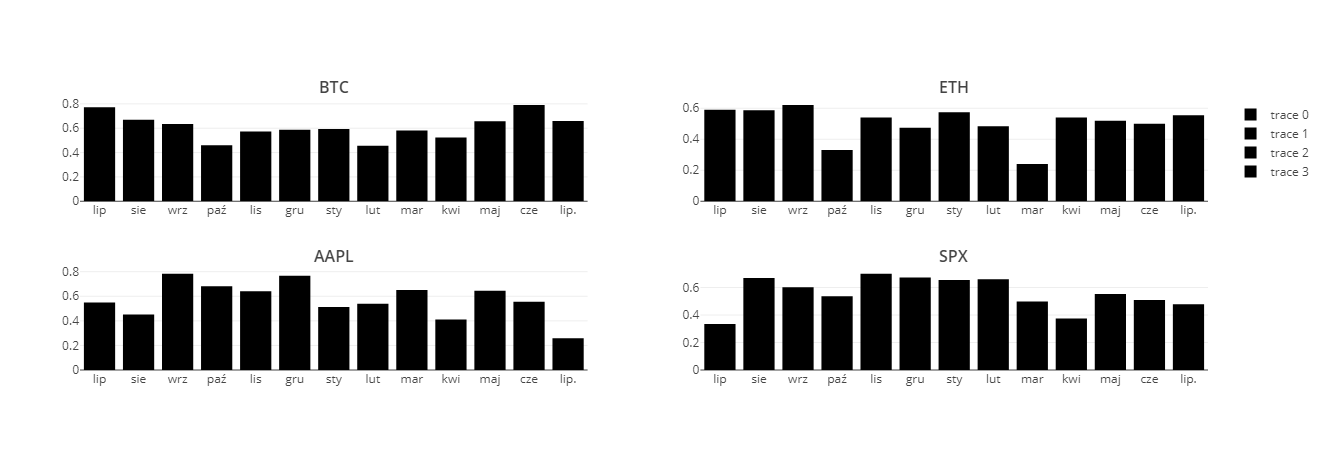

In [8]:
fig = tls.make_subplots(rows=2, cols=2, subplot_titles=['<b>BTC</b>', '<b>ETH</b>', '<b>AAPL</b>', '<b>SPX</b>'])
i = 0
for symbol, (sent, prices) in data.items():
    agg = pd.concat([sent, prices], axis=1)
    agg.columns=['sent', 'price']
    corr = agg.groupby([prices.index.year, prices.index.month]).apply(lambda x: pearsonr(x.sent, x.price)[0])
    trace = go.Bar(x=index, y=corr.values, marker_color='rgb(0,0,0)')
    fig.append_trace(trace, int(i / 2) + 1, int(i % 2) + 1)
    i += 1
iplot(fig)